# Newtonian Simulation Using Sympy for Symbolic Force Derivation

In [1]:
import sympy as sp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [4]:
# -------------------------------
# 1) Define symbolic expressions using Sympy
# -------------------------------

# Define symbolic variables for the positions
x1, x2 = sp.symbols('x1 x2', real=True)

# Define the repulsive potential energy: V = 1/|x2 - x1|
V = 1/sp.Abs(x2 - x1)

# Compute forces using Newton's second law: F = -dV/dx
F1 = -sp.diff(V, x1)
F2 = -sp.diff(V, x2)

# Simplify expressions (they will be computed piecewise internally)
F1 = sp.simplify(F1)
F2 = sp.simplify(F2)

display("F1:", F1)  # Expected to yield: F1 = -sign(x2 - x1) / |x2 - x1|^2
display("F2:", F2)  # Expected to yield: F2 = sign(x2 - x1) / |x2 - x1|^2

# Lambdify the force expressions for numerical evaluation
f1_func = sp.lambdify((x1, x2), F1, modules="numpy")
f2_func = sp.lambdify((x1, x2), F2, modules="numpy")

'F1:'

Piecewise((0, Eq(x1, x2)), (1/((x1 - x2)*Abs(x1 - x2)), True))

'F2:'

Piecewise((0, Eq(x1, x2)), (-1/((x1 - x2)*Abs(x1 - x2)), True))

In [5]:
# -------------------------------
# 2) Define the ODE system using Newton's F = m*a
# -------------------------------

# Define masses
m1 = 1.0
m2 = 1.0

def system_newtonian(t, y):
    """
    Compute the time-derivative of the state vector using Newtonian mechanics.

    The state vector is:
       y = [x1, x2, v1, v2]
    where
       dx1/dt = v1,
       dx2/dt = v2,
       dv1/dt = F1/m1,
       dv2/dt = F2/m2.
    The forces F1 and F2 are computed using the sympy-derived functions.
    """
    x1, x2, v1, v2 = y
    F1 = f1_func(x1, x2)
    F2 = f2_func(x1, x2)
    a1 = F1 / m1
    a2 = F2 / m2
    return [v1, v2, a1, a2]

In [6]:
# -------------------------------
# 3) Set up and solve the ODE system
# -------------------------------

# Initial conditions for positions and velocities
x1_0 = -125.0   # initial position of mass 1
x2_0 = 0.0      # initial position of mass 2
v1_0 = 1.0      # initial velocity of mass 1
v2_0 = 0.0      # initial velocity of mass 2
y0 = [x1_0, x2_0, v1_0, v2_0]

# Define simulation time span
t_max = 250
t_eval = np.linspace(0, t_max, 1000)

# Solve the system using SciPy's solve_ivp
sol = solve_ivp(system_newtonian, [0, t_max], y0, t_eval=t_eval, rtol=1e-9, atol=1e-9)
solution = pd.DataFrame(sol.y.T, columns=['x1', 'x2', 'v1', 'v2'], index=sol.t)

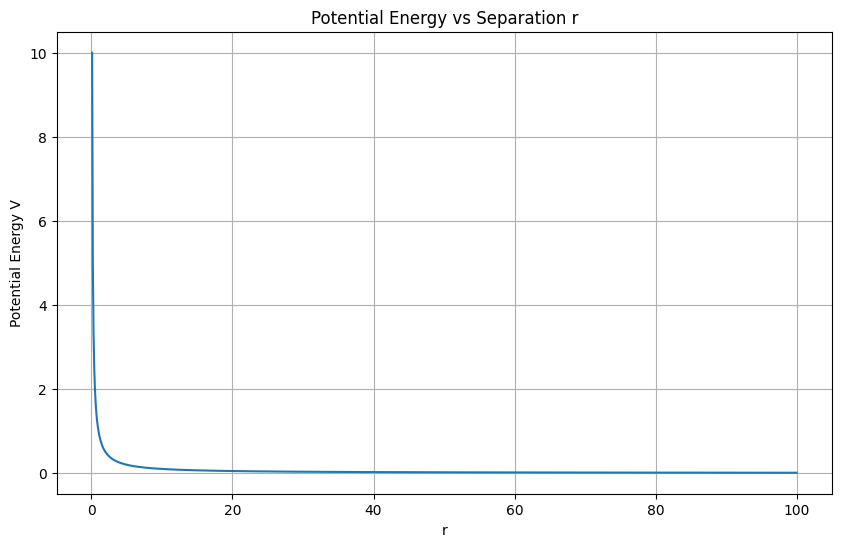

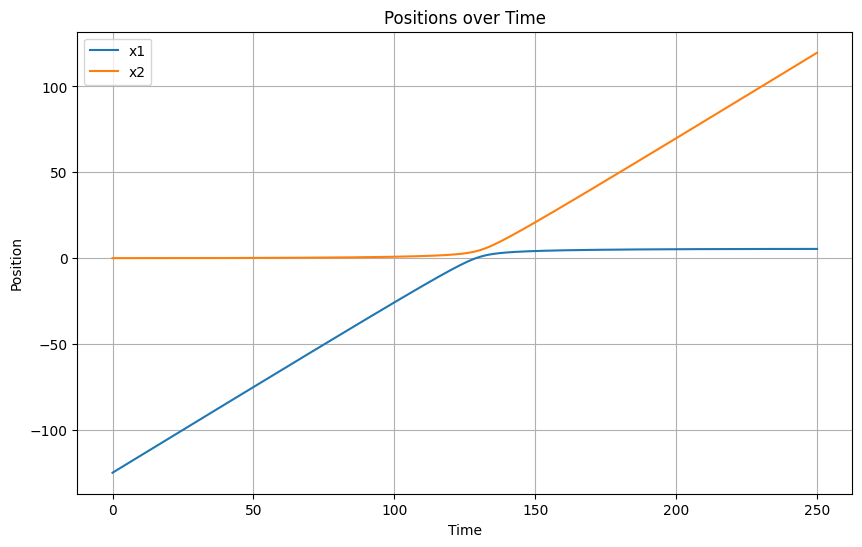

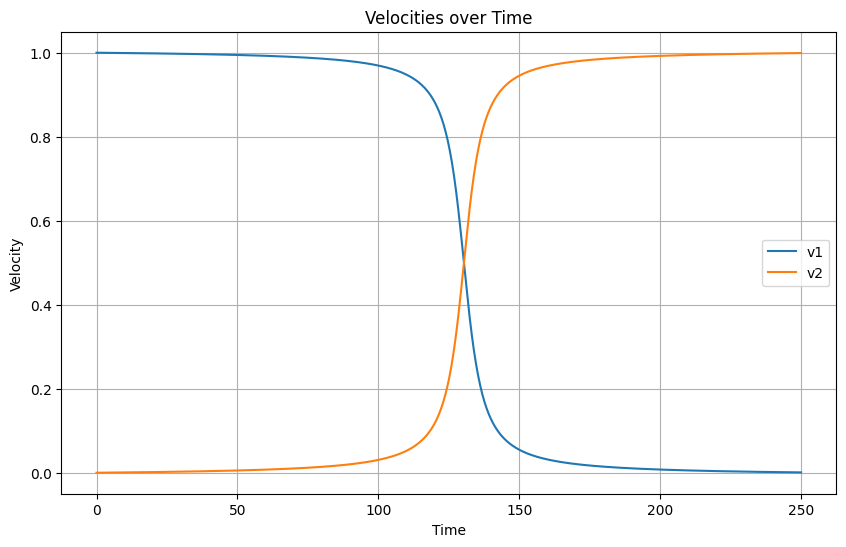

In [8]:
# -------------------------------
# 4) Plot the results
# -------------------------------

# Plot the potential energy vs separation
r_eval = np.linspace(0.1, 100, 1000)
V_func = sp.lambdify((x1, x2), V)  # lambdify the potential function
V_eval = V_func(r_eval, 0)  # as the potential V = 1/|r| with r = separation
pd.Series(data=V_eval, index=r_eval).plot(
    figsize=(10, 6),
    xlabel='r',
    ylabel='Potential Energy V',
    title='Potential Energy vs Separation r',
    grid=True
)
plt.show()

# Plot positions over time
solution[["x1", "x2"]].plot(figsize=(10, 6), xlabel='Time', ylabel='Position',
                           title='Positions over Time', grid=True)
plt.show()

# Plot velocities over time
solution[["v1", "v2"]].plot(figsize=(10, 6), xlabel='Time', ylabel='Velocity',
                           title='Velocities over Time', grid=True)
plt.show()